# Final Review

In [159]:
using Random
using Plots
using StatsBase
using GraphRecipes
using LightGraphs

## Dynamic Graphs

In [205]:
function sample_krapivsky_redner(n0, m, N, α=1)
    nodes = collect(1:N)
    G = random_regular_graph(n0, m)
    initial_edges = edges(G)
    G = SimpleGraph(N)
    for edge in initial_edges
        n1, n2 = src(edge), dst(edge)
        add_edge!(G, n1, n2)
    end

    for t=1:N - n0
        n_new = t + n0
        probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
        n_edges = length(edges(G))
    end
    return G
end

function frequency(values)
    freq = Dict{Int64, Int64}()
    for value ∈ values
        if value ∈ keys(freq)
            freq[value] += 1
        else
            freq[value] = 1
        end
    end
    return freq
end


"""
# Barabási-Albert model
"""
function sample_ab(n0, N, m)
    nodes = collect(1:N)
    G = SimpleGraph(N)
    add_edge!(G, 1, 2)

    for t=1:N-n0
        probs = ProbabilityWeights(degree(G))
        n_new = n0 + t
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
    end
    return G
end

sample_ab

### Barabasi-Albert model

In [222]:
n0, N, m = 6, 10_000, 2
G = sample_ab(n0, N, m)
mean(degree(G))

3.9978

In the BA model, the stationary solution $p_k$, as $t\to\infty$ is given by 
$$
    p_k = \frac{2m(m+1)}{k(k+1)(k+2)}
$$

In the following cell, we compare the theoretical result v.s. an empirical result (for large $N$).

In [259]:
p(k) = 2m * (m + 1) / (k * (k + 1) * (k + 2))

k_vals = 2:241
true_probs = p.(k_vals)
true_probs = Dict(zip(k_vals, true_probs))

n̂kt = frequency(degree(G))
pk = Dict(key => (value/N, round(true_probs[key], digits=4)) for (key, value) in n̂kt if key!=0)
sort(collect(pk))

68-element Array{Pair{Int64,Tuple{Float64,Float64}},1}:
   2 => (0.5018, 0.5)
   3 => (0.1998, 0.2)
   4 => (0.0971, 0.1)
   5 => (0.0555, 0.0571)
   6 => (0.0357, 0.0357)
   7 => (0.0238, 0.0238)
   8 => (0.0177, 0.0167)
   9 => (0.0142, 0.0121)
  10 => (0.0083, 0.0091)
  11 => (0.0075, 0.007)
  12 => (0.0041, 0.0055)
  13 => (0.0047, 0.0044)
  14 => (0.0039, 0.0036)
     ⋮
  85 => (0.0001, 0.0)
  91 => (0.0002, 0.0)
 103 => (0.0001, 0.0)
 105 => (0.0001, 0.0)
 106 => (0.0001, 0.0)
 108 => (0.0001, 0.0)
 117 => (0.0001, 0.0)
 118 => (0.0001, 0.0)
 133 => (0.0001, 0.0)
 178 => (0.0001, 0.0)
 189 => (0.0001, 0.0)
 241 => (0.0001, 0.0)

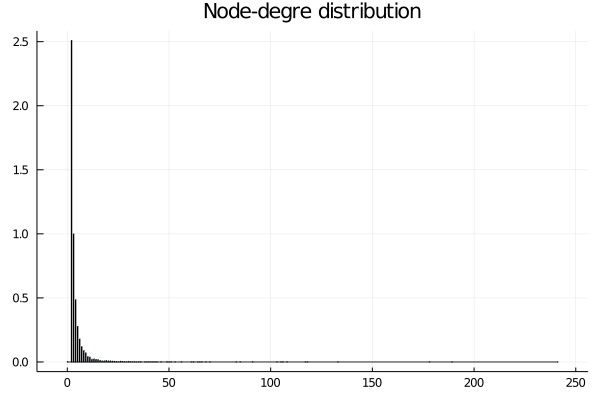

In [269]:
histogram(degree(G), normalize=true, label=nothing, title="Node-degre distribution")

### Krapivsky, Redner, Leyvraz model

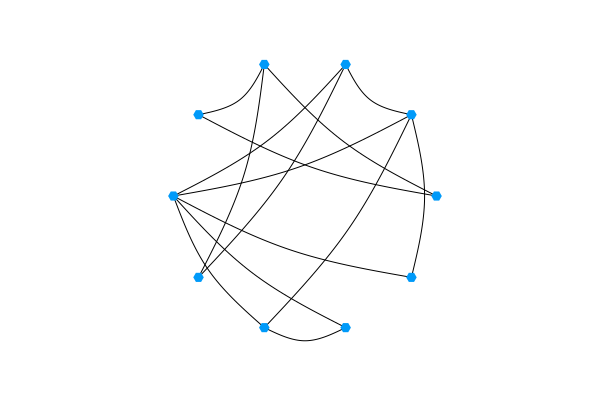

In [213]:
n0, m, N = 6, 2, 10
α = 1.0
T = N - n0

G = sample_krapivsky_redner(n0, m, N, α)
graphplot(G, method=:circular, nodestrokealpha=0)

In [215]:
n0, m, N = 6, 2, 10000
α = 0.0

G = sample_krapivsky_redner(n0, m, N, α)
mean(degree(G))

3.9988

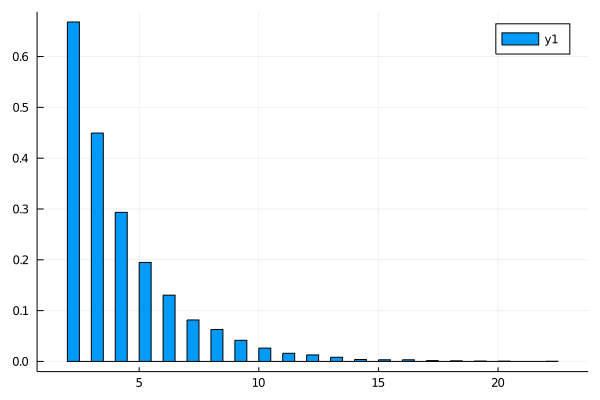

In [216]:
n̂kt = frequency(degree(G))
pk = Dict(key => value/N for (key, value) in n̂kt)
histogram(degree(G), normalize=true)

In [217]:
sort(collect(pk))

20-element Array{Pair{Int64,Float64},1}:
  2 => 0.334
  3 => 0.2247
  4 => 0.1467
  5 => 0.0974
  6 => 0.0652
  7 => 0.0408
  8 => 0.0314
  9 => 0.0208
 10 => 0.0131
 11 => 0.008
 12 => 0.0064
 13 => 0.0041
 14 => 0.0019
 15 => 0.0016
 16 => 0.0016
 17 => 0.0008
 18 => 0.0006
 19 => 0.0004
 20 => 0.0003
 22 => 0.0002

In [218]:
m = 5
-round(log(m / (m + 1)), digits=5)

0.18232

In [194]:
p(k) = (2m / (2m + 1)) ^ (k - m) / (2m + 1)
p2(k) = (m / (m + 1))  ^ (k - m) / (m + 1)

p2.(0:20)

21-element Array{Float64,1}:
 0.4147199999999999
 0.3455999999999999
 0.288
 0.24
 0.19999999999999998
 0.16666666666666666
 0.1388888888888889
 0.11574074074074076
 0.09645061728395064
 0.0803755144032922
 0.06697959533607684
 0.0558163294467307
 0.04651360787227558
 0.038761339893562986
 0.032301116577969156
 0.02691759714830763
 0.022431330956923026
 0.01869277579743586
 0.015577313164529883
 0.012981094303774901
 0.010817578586479087

In [204]:
p(k) = 2m * (m + 1) / (k * (k + 1) * (k + 2))

sum(p.(m:200))

0.9992611201418651

In [167]:
# Uniform attachment model
p(k) = exp(1) * exp(-k/m) / m

p (generic function with 1 method)

In [48]:
# Total number of links at time T
m * (N - n0 / 2)

39988.0

In [49]:
G

{10000, 39988} undirected simple Int64 graph

Number of edges at time $t$ is given by

$$
    l_t = m\left(\frac{n_0}{2} + t\right)
$$

In [12]:
nodes = 1:N
t=1
probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
sample(nodes, probs, m, replace=false)

4-element Array{Int64,1}:
 5
 8
 9
 6

In [240]:
n0, m, N = 6, 4, 10
T = N - n0
α = 1.0

Random.seed!(314)

nodes = collect(1:N)
G = random_regular_graph(n0, m)
initial_edges = edges(G)
G = SimpleGraph(N)
for edge in initial_edges
    n1, n2 = src(edge), dst(edge)
    add_edge!(G, n1, n2)
end

for t=1:N - n0
    n_new = t + n0
    probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
    for n_connect in sample(nodes, probs, m, replace=false)
        add_edge!(G, n_new, n_connect)
    end
end

